In [1]:
#Visualizations with Python

#Imports and Libraries. Run this cell first!
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

#Dataset used for assignment. Running last line of this cell should give an idea of what columns and values are included
diabetic_data = pd.read_csv('diabetic_data.csv')


#diabetic_data.head(10)


Text(0.5, 1.0, 'Average Number of lab procedures by Age')

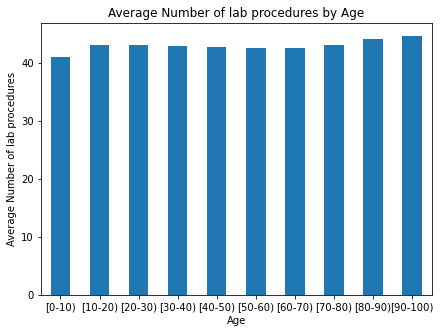

In [29]:
#1 Simple Bar Graph

#Grabbing only the columns that include age and # of lab procedures values
cols = [4,12]
data = diabetic_data[diabetic_data.columns[cols]]

#Use groupby method to aggregate lab procedures values and get averages grouped by age groups
data2 = data.groupby(["age"]).mean()


#Create a bar graph of specific size and no legend as it is not needed
data2.plot(kind='bar',figsize=(7,5),legend=False)

#Labeling and readability, ensuring the right axis is being shown
plt.xticks(rotation=0)
plt.xlabel("Age")
plt.ylabel("Average Number of lab procedures")
plt.title("Average Number of lab procedures by Age")

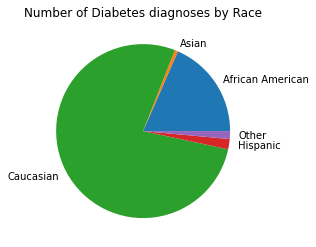

race
AfricanAmerican    136552
Asian                4519
Caucasian          574151
Hispanic            14105
Other               10823
Name: number_diagnoses, dtype: int64

In [13]:
#2 Pie Graph

#Grabbing specific columns from the dataset
cols = [1,2,3,4,5,11,12,14,21,41,48]
data = diabetic_data[diabetic_data.columns[cols]]

#Removing rows with question mark values in the 'race' column
data = data.loc[data["race"] != "?", ['race', 'number_diagnoses']]

#Using groupby to get the sum of diagnoses amount, grouped by race
data2 = data.groupby(["race"])["number_diagnoses"].sum()

#Converting grouped dataframe to a numpy array
data2_np = data2.to_numpy()
y = data2_np

#Plot a pie chart using defined labels and our converted numpy data
myLabels = ["African American","Asian","Caucasian","Hispanic","Other"]
plt.pie(y, labels = myLabels)

#Adds the title and shows the graph
plt.title("Number of Diabetes diagnoses by Race")
plt.show()

#This line shows the data in pandas format
#data2

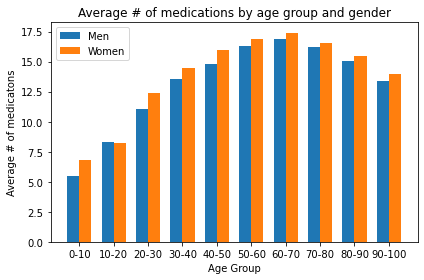

In [30]:
#3 Grouped Bar Chart

#Creates dataframe containing specific columns
cols = [1,2,3,4,5,11,12,14,21,41,48]
data = diabetic_data[diabetic_data.columns[cols]]

#Create two dataframes, each containing either Male or Female data
men_data = data.loc[data['gender'] == 'Male']
women_data = data.loc[data['gender'] == 'Female']

#Get the average # of medications from Male and Female data, each grouped by age range
men_data2 = men_data.groupby(["age"])["num_medications"].mean()
women_data2 = women_data.groupby(["age"])["num_medications"].mean()

#Converting both to numpy arrays
men_np = men_data2.to_numpy()
women_np = women_data2.to_numpy()

#Define label variable 'age' as well as the label locations and bar widths
age = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
x = np.arange(len(age))  # the label locations
width = 0.35  # the width of the bars

#Create a subplot graph, which allows us to graph with mulitple bars
fig, ax = plt.subplots()
men = ax.bar(x - width/2, men_np, width, label='Men') #Creates bar graph for men data
women = ax.bar(x + width/2, women_np, width, label='Women') #Creates bar graph for women data

#Create axes labels
ax.set_xlabel('Age Group')
ax.set_ylabel('Average # of medicatons')

#Sets the location of labels and the name at each 'tick'
ax.set_xticks(x)
ax.set_xticklabels(age)

#Create a legend to show what is the men or women bars, as well as a title and layout
ax.legend()

ax.set_title('Average # of medications by age group and gender')

fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

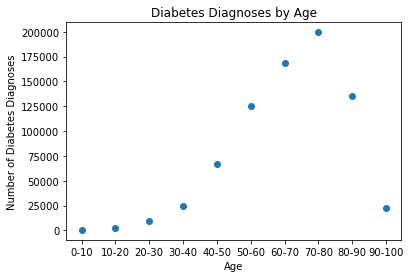

In [3]:
#4 Scatter Plot


#Creates dataframe containing specific columns
cols = [1,2,3,4,5,11,12,14,21,41,48]
data = diabetic_data[diabetic_data.columns[cols]]

#Using groupby to get the sum of diagnoses amount, grouped by age group
data2 = data.groupby(["age"])["number_diagnoses"].sum()

#Define the x axis as 'age', along with numpy array of the grouped data. 
age = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
diagnoses_number = data2.to_numpy()
plt.scatter(age,diagnoses_number)

#Labels
plt.xlabel("Age")
plt.ylabel("Number of Diabetes Diagnoses")
plt.title("Diabetes Diagnoses by Age")

#Show the graph
plt.show